In [ ]:
import cv2
import matplotlib.pyplot as plt

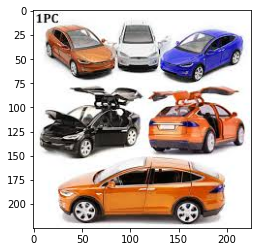

In [ ]:
image = cv2.imread('/content/cars.jpg', 1)
original_image = image.copy()
plt.imshow(image)

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
net = cv2.dnn.readNet('/content/drive/MyDrive/yolov3.weights', '/content/drive/MyDrive/yolov3.cfg')

In [ ]:
classes = []
with open('/content/drive/MyDrive/coco.names', 'r') as f:
#     print(f.readlines())
    classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/standfordcar.zip

Streaming output truncated to the last 5000 lines.
  inflating: cars_train/cars_train/03145.jpg  
  inflating: cars_train/cars_train/03146.jpg  
  inflating: cars_train/cars_train/03147.jpg  
  inflating: cars_train/cars_train/03148.jpg  
  inflating: cars_train/cars_train/03149.jpg  
  inflating: cars_train/cars_train/03150.jpg  
  inflating: cars_train/cars_train/03151.jpg  
  inflating: cars_train/cars_train/03152.jpg  
  inflating: cars_train/cars_train/03153.jpg  
  inflating: cars_train/cars_train/03154.jpg  
  inflating: cars_train/cars_train/03155.jpg  
  inflating: cars_train/cars_train/03156.jpg  
  inflating: cars_train/cars_train/03157.jpg  
  inflating: cars_train/cars_train/03158.jpg  
  inflating: cars_train/cars_train/03159.jpg  
  inflating: cars_train/cars_train/03160.jpg  
  inflating: cars_train/cars_train/03161.jpg  
  inflating: cars_train/cars_train/03162.jpg  
  inflating: cars_train/cars_train/03163.jpg  
  inflating: cars_train/cars_train/03164.jpg  
  inflati

In [ ]:
layer_names = net.getLayerNames()

output_layer = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
layer_names = net.getLayerNames()

In [ ]:
layer_names

['conv_0',
 'bn_0',
 'relu_0',
 'conv_1',
 'bn_1',
 'relu_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'conv_3',
 'bn_3',
 'relu_3',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'conv_7',
 'bn_7',
 'relu_7',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_16',
 'conv_17',
 'bn_17',
 'relu_17',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_19',
 'conv_20',
 'bn_20',
 'relu_20',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_22',
 'conv_23',
 'bn_23',
 'relu_23',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_25',
 'conv_26',
 'bn_26',
 'relu_26',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_28',
 'conv_29',
 'bn_29',
 'relu_29',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_31',
 'conv_32',
 'bn_32',
 'relu_32',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_34',
 'conv_35',
 'bn

In [ ]:
output_layer = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
height, width,_ = gray_image.shape

In [ ]:
blob = cv2.dnn.blobFromImage(gray_image, 0.003, (512, 512), (0, 0, 0), True)

In [ ]:
net.setInput(blob)
outs = net.forward(output_layer)

In [ ]:
len(outs)

3

[2]
[0.9773040413856506]
[[85, 9, 44, 54]]
[2, 2]
[0.9773040413856506, 0.9829323291778564]
[[85, 9, 44, 54], [14, 18, 71, 50]]
[2, 2, 2]
[0.9773040413856506, 0.9829323291778564, 0.9957902431488037]
[[85, 9, 44, 54], [14, 18, 71, 50], [130, 18, 86, 55]]
[2, 2, 2, 2]
[0.9773040413856506, 0.9829323291778564, 0.9957902431488037, 0.9783280491828918]
[[85, 9, 44, 54], [14, 18, 71, 50], [130, 18, 86, 55], [7, 89, 102, 62]]
[2, 2, 2, 2, 2]
[0.9773040413856506, 0.9829323291778564, 0.9957902431488037, 0.9783280491828918, 0.9910265207290649]
[[85, 9, 44, 54], [14, 18, 71, 50], [130, 18, 86, 55], [7, 89, 102, 62], [117, 90, 98, 58]]
[2, 2, 2, 2, 2, 2]
[0.9773040413856506, 0.9829323291778564, 0.9957902431488037, 0.9783280491828918, 0.9910265207290649, 0.9762823581695557]
[[85, 9, 44, 54], [14, 18, 71, 50], [130, 18, 86, 55], [7, 89, 102, 62], [117, 90, 98, 58], [28, 151, 173, 69]]
[2, 2, 2, 2, 2, 2, 2]
[0.9773040413856506, 0.9829323291778564, 0.9957902431488037, 0.9783280491828918, 0.99102652072906

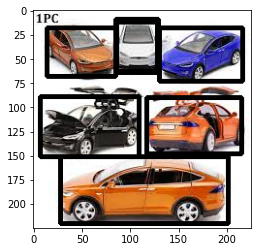

In [ ]:
import numpy as np

class_ids = []
boxes = []
confidences = []

for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        
        confidence = scores[class_id]
#         print(confidence)
        if confidence > 0.6:
            cx = int(det[0] * width)
            cy = int(det[1] * height)
            
            w = int(det[2] * width)
            h = int(det[3] * height)
            
            x, y = int(cx - w / 2), int(cy - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            print(class_ids)
            print(confidences)
            print(boxes)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), 2)
            
plt.imshow(image)

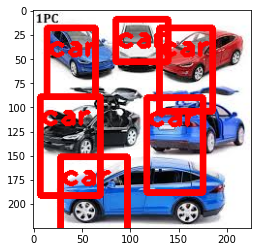

In [ ]:
n_det = len(boxes)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(gray_image, (x, y), (x+h, y+w), (255, 0, 0), 2)
        cv2.putText(gray_image, label, (x, y+30), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)

plt.imshow(gray_image)
